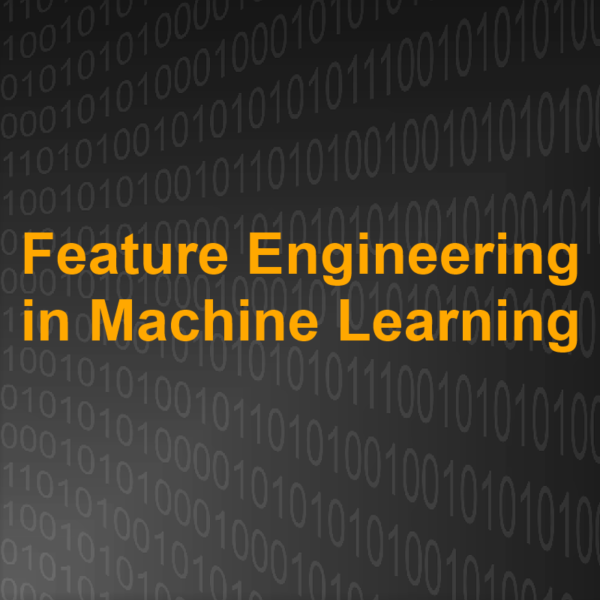

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [2]:
stack_df = pd.read_csv('https://raw.githubusercontent.com/danishansari09/FeatureEngineering/master/Combined_DS_v10.csv')

In [3]:
stack = stack_df.copy()

In [4]:
stack_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [5]:
stack_df.tail()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
994,10/19/18 13:50,Some college/university study without earning ...,NaN,Yes,France,NaN,Subversion,45,10,Male,NaN
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,Spain,8.0,Git,27,16,Male,"58,746.00"
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,USA,NaN,Git,54,16,Male,"$55,000.00"
997,2/5/18 20:01,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,Sweeden,NaN,Git;Subversion,23,9,NaN,NaN
998,2/11/18 21:23,Bachelor's degree (BA. BS. B.Eng.. etc.),1000000.0,No,Russia,NaN,Git,18,7,NaN,"1,000,000.00"


# Dealing With Categorical Features

In [6]:
only_objs = stack_df.select_dtypes(include=['object'])
only_objs.columns

Index(['SurveyDate', 'FormalEducation', 'Hobby', 'Country', 'VersionControl',
       'Gender', 'RawSalary'],
      dtype='object')

<p><b>SurveyDate contains DateTime, RawSalary is required to get converted into float, and for remainig [FormalEducation, Hobby, Country, VersionControl and Gender] is of type Object. Let's look at the unique values.</b>
</p>

In [7]:
stack_df['FormalEducation'].value_counts()

Bachelor's degree (BA. BS. B.Eng.. etc.)                                              482
Master's degree (MA. MS. M.Eng.. MBA. etc.)                                           241
Some college/university study without earning a degree                                130
Secondary school (e.g. American high school. German Realschule or Gymnasium. etc.)     58
Associate degree                                                                       33
Other doctoral degree (Ph.D. Ed.D.. etc.)                                              30
Professional degree (JD. MD. etc.)                                                     19
Primary/elementary school                                                               5
I never completed any formal education                                                  1
Name: FormalEducation, dtype: int64

In [8]:
stack_df['Hobby'].value_counts()

Yes    826
No     173
Name: Hobby, dtype: int64

In [9]:
stack_df['Country'].value_counts()

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64

In [10]:
stack_df['VersionControl'].value_counts()

Git                                                                                                             577
Git;Subversion                                                                                                   96
Git;Team Foundation Version Control                                                                              63
Subversion                                                                                                       37
Team Foundation Version Control                                                                                  28
Git;Copying and pasting files to network shares                                                                  23
Git;Mercurial                                                                                                    22
I don't use version control                                                                                      22
Git;Zip file back-ups                                                   

In [11]:
stack_df['Gender'].value_counts()

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64

In [12]:
# # Convert Hobby, Country & Gender into Categorical type
# cat_column_conv = ['Hobby','Country','Gender']
# stack_df[cat_column_conv] = stack_df[cat_column_conv].astype('category')

In [13]:
stack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


In [14]:
# Encoding Categorical Features
# One-hot encoding
# Dummy encoding
# Label encoding

In [15]:
# PANDAS: One-hot encoding
pd.get_dummies(stack_df, columns=['Hobby','Country'], prefix=['OH','OH']).head()

,SurveyDate,FormalEducation,ConvertedSalary,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,OH_No,...,OH_France,OH_India,OH_Ireland,OH_Russia,OH_South Africa,OH_Spain,OH_Sweeden,OH_UK,OH_USA,OH_Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,NaN,Git,21,13,Male,NaN,0,...,0,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,7.0,Git;Subversion,38,9,Male,"70,841.00",0,...,0,0,0,0,0,0,1,0,0,0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,8.0,Git,45,11,NaN,NaN,1,...,0,0,0,0,0,0,1,0,0,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,...,0,0,0,0,0,0,1,0,0,0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,8.0,Git,39,7,Male,"£41,671.00",0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# PANDAS: Dummy encoding
pd.get_dummies(stack_df, columns=['Hobby','Country'], drop_first=True, prefix=['DM','DM']).head()

,SurveyDate,FormalEducation,ConvertedSalary,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,DM_Yes,DM_India,DM_Ireland,DM_Russia,DM_South Africa,DM_Spain,DM_Sweeden,DM_UK,DM_USA,DM_Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,NaN,Git,21,13,Male,NaN,1,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,7.0,Git;Subversion,38,9,Male,"70,841.00",1,0,0,0,0,0,1,0,0,0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,0,1,0,0,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,NaN,Zip file back-ups,46,12,Male,"21,426.00",1,0,0,0,0,0,1,0,0,0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,8.0,Git,39,7,Male,"£41,671.00",1,0,0,0,0,0,0,1,0,0


In [17]:
# # PANDAS: Label Encoding (Works only on Categorical Data)
# stack_df['Hobby_LBL'] = stack_df['Hobby'].cat.codes
# stack_df.head()

# Limiting Columns

<p><b>Some features can have many different categories but a very uneven distribution of their occurrences. In these cases, you may not want to create a feature for each value, but only the more common occurrences.</b></p>

In [18]:
# For limiting categorical data, type should be Object

In [19]:
counts = stack_df['Country'].value_counts()

In [20]:
counts

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64

In [21]:
mask = stack_df['Country'].isin(counts[counts < 100].index)

In [22]:
stack_df['Country'][mask] = 'Other'

/tmp/ipykernel_679/354509683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stack_df['Country'][mask] = 'Other'


In [23]:
stack_df['Country'].value_counts()

Other           301
South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Name: Country, dtype: int64

# Binning Numeric Variables

<p><b>For many continuous values you will care less about the exact value of a numeric column, but instead care about the bucket it falls into. This can be useful when plotting values, or simplifying your machine learning models. It is mostly used on continuous variables where accuracy is not the biggest concern e.g. age, height, wages.</b></p>

In [24]:
# Let's defined Categories per Age Groups
# 0-18- Teen
# 18-25- Young
# 25-35- Adult
# 35-55- Young Adult
# 55-75- Old
# 75-100- Senoir
bins = [0, 18, 25, 35, 55, 75, 100 ]

In [25]:
group_names = ['Teen','Young','Adult','Young Adult','Old','Senior']

In [26]:
stack_df['age_group'] = pd.cut(stack_df['Age'], bins=bins, labels=group_names)

In [27]:
stack_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,age_group
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN,Young
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00",Young Adult
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN,Young Adult
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00",Young Adult
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,Other,8.0,Git,39,7,Male,"£41,671.00",Young Adult


In [28]:
stack_df['age_group'].value_counts()

Young Adult    403
Adult          247
Young          149
Teen           117
Old             82
Senior           1
Name: age_group, dtype: int64

 # Binarizing Numeric Variables

<p><b>While numeric values can often be used without any feature engineering, there will be cases when some form of manipulation can be useful. For example on some occasions, you might not care about the magnitude of a value but only care about its direction, or if it exists at all. In these situations, you will want to binarize a column.</b></p>

In [29]:
stack_df['is_experienced'] = 0

In [30]:
stack_df.loc[stack_df['Years Experience'] > 0, 'is_experienced'] = 1

In [31]:
stack_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,age_group,is_experienced
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN,Young,1
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00",Young Adult,1
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN,Young Adult,1
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00",Young Adult,1
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,Other,8.0,Git,39,7,Male,"£41,671.00",Young Adult,1


In [32]:
stack_df['is_experienced'].value_counts()

1    973
0     26
Name: is_experienced, dtype: int64

# Dealing with Missing Values

In [33]:
stack_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,age_group,is_experienced
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN,Young,1
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00",Young Adult,1
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN,Young Adult,1
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00",Young Adult,1
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,Other,8.0,Git,39,7,Male,"£41,671.00",Young Adult,1


### Listwise deletion in Python

In [34]:
# Drop all rows with at least one missing values
stack_df.dropna(how='any').shape

(264, 13)

In [35]:
# Drop all columns with incomplete rows
stack_df.dropna(how='any', axis=1).shape

(999, 9)

In [36]:
# Drop rows with missing values in a specific column
stack_df.dropna(subset=['ConvertedSalary']).shape

(665, 13)

<p><b>Issues with deletion</b></p>
<ol>
    <li>It deletes valid data points - it deletes perfectly valid data points that share a row with a missing value.</li>
    <li>Relies on randomness - if the missing values do not occur entirely at random it can negatively affect the model.</li>
    <li>Reduces information - if you were to remove a feature instead of a row it can reduce the degrees of freedom of your model.</li>
<ol>

### Replacing missing values with constants

In [37]:
stack_df['Gender'].isnull().sum()

306

In [38]:
# Let's replace the missing values in the Gender column with the string 'Not Provided'

In [39]:
stack_df['Gender'].fillna(value='Not Provided', inplace=True)

In [40]:
stack_df['Gender'].value_counts()

Male                                                                         632
Not Provided                                                                 306
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64

### Recording missing values

<p><b>In situations where you believe that the absence or presence of data is more important than the values themselves, you can create a new column that records the absence of data and then drop the original column.</b></p>

In [41]:
# Record where the values are not missing
stack_df['Salary_Provided'] = stack_df['ConvertedSalary'].notnull()

In [42]:
stack_df['Salary_Provided']

0      False
1       True
2      False
3       True
4       True
       ...  
994    False
995     True
996     True
997    False
998     True
Name: Salary_Provided, Length: 999, dtype: bool

<p><b>One of the most common issues with removing all rows with missing values is if you were building a predictive model. If you were to remove all cases that had missing values when training your model, you would quickly run into problems when you received missing values in your test set, where you do not have the option of just not predicting these rows. "Can't delete rows with missing values in the test set".</b></p>

<p><b>What else can you do?</b></p>
<ul>
    <li><b>Categorical columns:</b> Replace missing values with the most common occurring value or with a string that flags missing values such as 'None'.</li>
    <li><b>Numeric columns:</b> Replace missing values with a suitable value.</li>
</ul>

### Filling continuous missing values

<p><b>In these cases, it may be most valid to fill the missing values in the column with a value calculated from the entries present in the column.</b></p>
<p><b>The most commonly used values are the mean and the median.</b></p>
<p><b>One caveat that you must keep in mind when using these methods is that it can lead to biased estimates of the variances and covariances of the features. Similarly, the standard error and test statistics can be incorrectly estimated so if these metrics are needed they should be calculated before the missing values have been filled.<b></p>

### Calculating the measures of central tendency

In [43]:
print('Mean:{}'.format(stack_df['ConvertedSalary'].mean()))
print('Median:{}'.format(stack_df['ConvertedSalary'].median()))

Mean:92565.16992481203
Median:55562.0


In [44]:
stack_df['ConvertedSalary'] = stack_df['ConvertedSalary'].fillna(stack_df['ConvertedSalary'].mean())

In [45]:
stack_df['ConvertedSalary'].isnull().sum()

0

### Dealing with stray characters

<p><b>RawSalary column of so_survey_df which contains the wages of the respondents along with the currency symbols and commas, such as $42,000. When importing data from Microsoft Excel, more often that not you will come across data in this form.</b></p>

#### Bad characters

In [46]:
stack_df['RawSalary'].dtype

dtype('O')

In [47]:
stack_df['RawSalary']

0               NaN
1         70,841.00
2               NaN
3         21,426.00
4        £41,671.00
           ...     
994             NaN
995       58,746.00
996      $55,000.00
997             NaN
998    1,000,000.00
Name: RawSalary, Length: 999, dtype: object

#### Dealing with bad characters

In [48]:
# First remove "," from the values
stack_df['RawSalary'] = stack_df['RawSalary'].str.replace(",","")

In [49]:
# stack_df['RawSalary'].astype('float')
# While converting dtype to float will raise ValueError. Because still the feature have string characters. 
# Let's check and remove.

#### Finding other stray characters

In [50]:
coerced_vals = pd.to_numeric(stack_df['RawSalary'], errors='coerce')

In [51]:
coerced_vals

0            NaN
1        70841.0
2            NaN
3        21426.0
4            NaN
         ...    
994          NaN
995      58746.0
996          NaN
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64

In [52]:
stack_df[coerced_vals.isna()]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,age_group,is_experienced,Salary_Provided
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),92565.169925,Yes,South Africa,NaN,Git,21,13,Male,NaN,Young,1,False
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),92565.169925,No,Sweeden,8.0,Git,45,11,Not Provided,NaN,Young Adult,1,False
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.000000,Yes,Other,8.0,Git,39,7,Male,£41671.00,Young Adult,1,True
6,5/25/18 6:11,Bachelor's degree (BA. BS. B.Eng.. etc.),92565.169925,Yes,Other,NaN,Git,34,11,Male,NaN,Adult,1,False
8,10/7/18 22:14,Bachelor's degree (BA. BS. B.Eng.. etc.),92565.169925,No,South Africa,10.0,Git,23,17,Male,NaN,Young,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,4/15/18 2:37,Bachelor's degree (BA. BS. B.Eng.. etc.),92565.169925,No,USA,NaN,Git,70,11,Male,NaN,Old,1,False
992,9/3/18 20:35,Associate degree,92565.169925,Yes,Spain,10.0,Git,50,6,Not Provided,NaN,Young Adult,1,False
994,10/19/18 13:50,Some college/university study without earning ...,92565.169925,Yes,France,NaN,Subversion,45,10,Male,NaN,Young Adult,1,False
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.000000,Yes,USA,NaN,Git,54,16,Male,$55000.00,Young Adult,1,True


<p><b>Still contains strings like $ and £ and so, it is the reason for ValueError when converting dtype to float</b></p>

<p>Let's apply chaining methods and remove strings and then convert to float.</p>

In [53]:
stack_df['RawSalary'] = stack_df['RawSalary'].str.replace("$","").str.replace("£","").astype('float')                        

/tmp/ipykernel_679/3528535226.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stack_df['RawSalary'] = stack_df['RawSalary'].str.replace("$","").str.replace("£","").astype('float')


In [54]:
stack_df['RawSalary'].dtype

dtype('float64')

In [55]:
stack_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,age_group,is_experienced,Salary_Provided
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),92565.169925,Yes,South Africa,NaN,Git,21,13,Male,NaN,Young,1,False
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.000000,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,70841.0,Young Adult,1,True
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),92565.169925,No,Sweeden,8.0,Git,45,11,Not Provided,NaN,Young Adult,1,False
3,5/9/18 1:06,Some college/university study without earning ...,21426.000000,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,21426.0,Young Adult,1,True
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.000000,Yes,Other,8.0,Git,39,7,Male,41671.0,Young Adult,1,True


# Data distributions

<p><b>Almost every model besides tree based models assume that your data is normally distributed. Normal distributions follow a bell shape.</b></p>

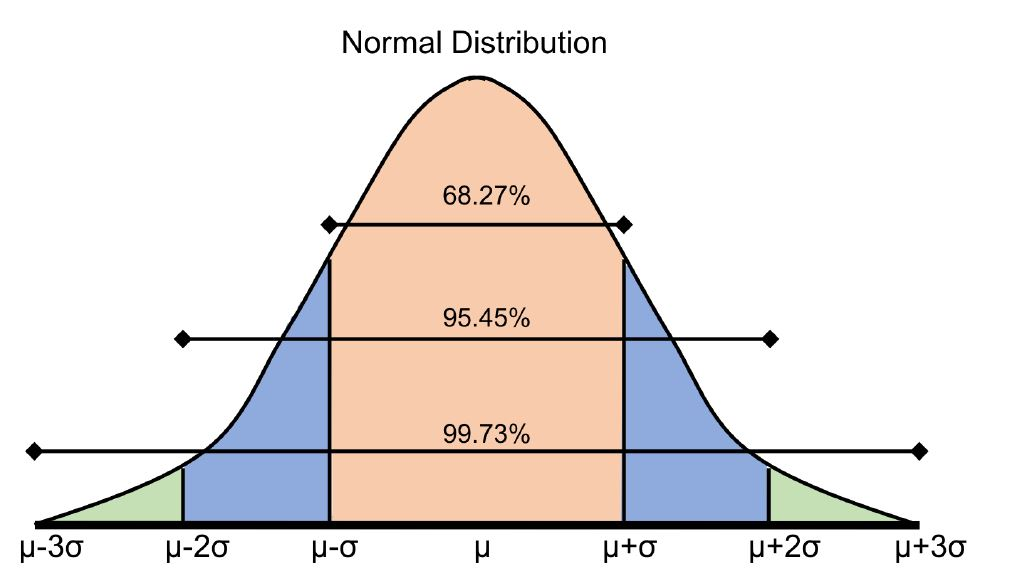

### Observing Data

<p><b>To understand the shape of data, histograms can be created for each of the continuous features.</b></p>

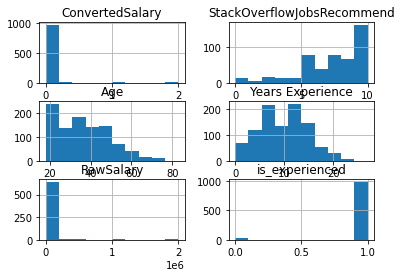

In [56]:
_ = stack_df.hist()
_ = plt.show()

<p><b>While histograms can be useful to show the high level distribution of the data, it does not show details such as where the middle chunk of data sits in an easily readable fashion. For this box plot can be used. The box plot shows the distribution of the data by calculating where the middle 50% of the data sits, this is also known as the Inter quartile range or IQR (it sits between the 1st and 3rd quartile) and marking it with the box. The whiskers extend to the minimum of 1.5 times the IQR from the edge of the box or the maximum range of the data. Any points outside this are marked as outliers. This can be useful to also see if there are points in dataset that may be unwanted outliers.</b></p>

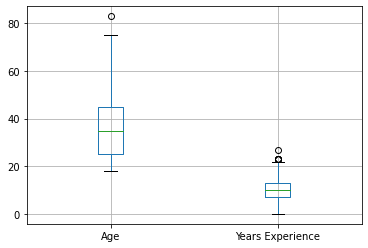

In [57]:
_ = stack_df[['Age','Years Experience']].boxplot()
_ = plt.show()

<p><b>One final approach to looking at the distribution of data is to examine how different features in DataFrame interact with each other. This type of chart is called a pairplot and can be useful to see if multiple columns are correlated with each other or whether they have any association at all.</b></p>

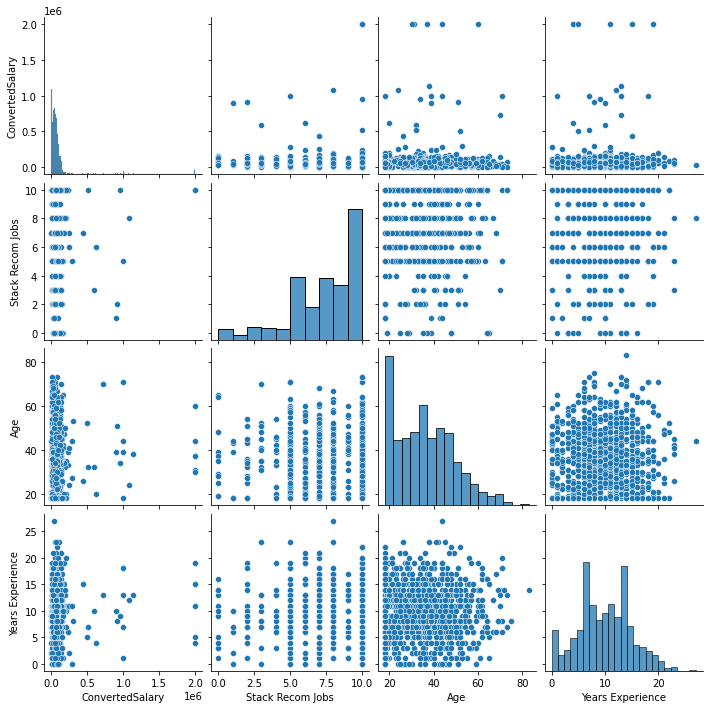

In [58]:
stack.rename(columns={"StackOverflowJobsRecommend": 'Stack Recom Jobs'}, inplace=True)
_ = sns.pairplot(stack)
_ = plt.show()

# Further details on your distributions

In [59]:
stack_df.describe()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience,RawSalary,is_experienced
count,9.990000e+02,487.000000,999.000000,999.000000,6.650000e+02,999.000000
mean,9.256517e+04,7.061602,36.003003,9.961962,9.256517e+04,0.973974
std,1.705864e+05,2.621591,13.255127,4.878129,2.091344e+05,0.159292
min,0.000000e+00,0.000000,18.000000,0.000000,0.000000e+00,0.000000
25%,4.164150e+04,5.000000,25.000000,7.000000,2.755000e+04,1.000000
50%,9.000000e+04,7.000000,35.000000,10.000000,5.556200e+04,1.000000
75%,9.256517e+04,10.000000,45.000000,13.000000,8.823800e+04,1.000000
max,2.000000e+06,10.000000,83.000000,27.000000,2.000000e+06,1.000000


# Scaling and transformation

### Normalization

<p><b>In normalization we linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest. When using scikit-learn (the most commonly used machine learning library in Python) you can use a MinMaxScaler to apply normalization. (It is called this as it scales your values between a minimum and maximum value.)</b></p>

In [60]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [61]:
# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

In [62]:
# Fit MM_scaler to the data
MM_scaler.fit(stack_df[['Age']])

MinMaxScaler()

In [63]:
# Transform the data using the fitted scaler
stack_df['Age_MM'] = MM_scaler.transform(stack_df[['Age']])

In [64]:
stack_df[['Age_MM','Age']].head()

,Age_MM,Age
0,0.046154,21
1,0.307692,38
2,0.415385,45
3,0.430769,46
4,0.323077,39


<AxesSubplot:>

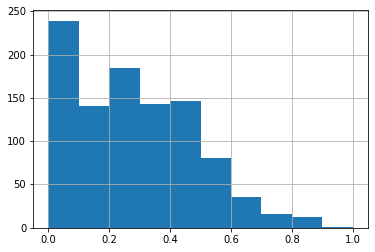

In [65]:
stack_df['Age_MM'].hist()

### Standardization

<p><b>While normalization can be useful for scaling a column between two data points, it is hard to compare two scaled columns if even one of them is overly affected by outliers. One commonly used solution to this is called standardization, where instead of having a strict upper and lower bound, you center the data around its mean, and calculate the number of standard deviations away from mean each data point is.</b></p>

In [66]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [67]:
# Instantiate StandardScaler
SS_scaler = StandardScaler()

In [68]:
# Fit SS_scaler to the data
SS_scaler.fit(stack_df[['Age']])

StandardScaler()

In [69]:
# Transform the data using the fitted scaler
stack_df['Age_SS'] = SS_scaler.transform(stack_df[['Age']])

In [70]:
stack_df[['Age_SS', 'Age']].head()

,Age_SS,Age
0,-1.132431,21
1,0.150734,38
2,0.679096,45
3,0.754576,46
4,0.226214,39


<AxesSubplot:>

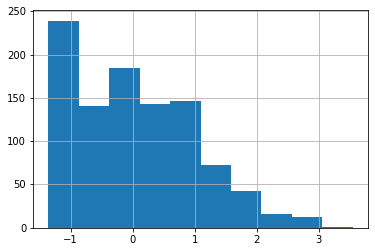

In [71]:
stack_df['Age_SS'].hist()

### Log transformation

<p><b>Previuosuly we scaled the data linearly, which will not affect the data's shape. This works great if your data is normally distributed (or closely normally distributed), an assumption that a lot of machine learning models make. Sometimes we need to work with data that closely conforms to normality, e.g the height or weight of a population. On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population. In this exercise will use a log transform on the ConvertedSalary column in the DataFrame as it has a large amount of its data centered around the lower values, but contains very high values also. These distributions are said to have a long right tail.</b></p>

In [72]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

In [73]:
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

In [74]:
# Train the transform on the data
pow_trans.fit(stack_df[['ConvertedSalary']])

PowerTransformer()

In [75]:
# Apply the power transform to the data
stack_df['ConvertedSalary_LG'] = pow_trans.transform(stack_df[['ConvertedSalary']])

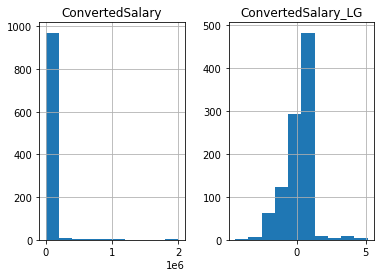

In [76]:
# Plot the data before and after the transformation
stack_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

# Removing Outliers

### What are outliers?
<p><b>Outliers are data points that exist far away from the majority of data. This can happen due to several reasons, such as incorrect data recording to genuine rare occurrences. Either way we need to remove these values as they can negatively impact our models.</b></p>

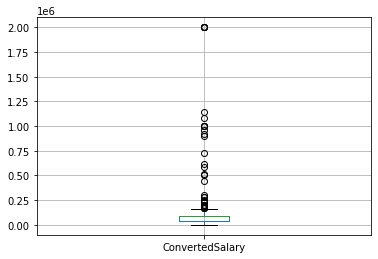

In [77]:
stack_df[['ConvertedSalary']].boxplot()
plt.show()

### Quantile Based Detection
<p><b>The first approach is to remove a certain percentage of the largest and/or smallest values in data. For example we could remove the top 5%. This is achieved by finding the 95th quantile (the point below which 95% of your data resides) and removing everything above it. This approach is particularly useful if we are concerned that the highest values in dataset should be avoided. When using this approach, we must remember that even if there are no real outliers, will still be removing the top 5% of values from the dataset.</b></p>

In [78]:
q_cutoff = stack_df['ConvertedSalary'].quantile(0.95)
q_cutoff

140000.0

In [79]:
mask = stack_df['ConvertedSalary'] < q_cutoff
mask

0       True
1       True
2       True
3       True
4       True
       ...  
994     True
995     True
996     True
997     True
998    False
Name: ConvertedSalary, Length: 999, dtype: bool

In [80]:
trimmed_df = stack_df[mask]

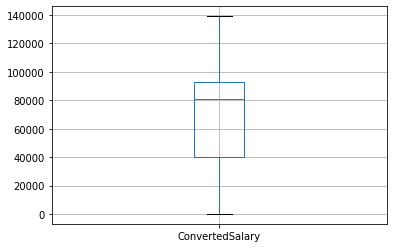

In [81]:
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

### Standard deviation based detection
<p><b>An alternative, and perhaps more statistically sound method of removing outliers is to instead choose what you consider to be outliers based on the mean and standard deviations of the dataset. For example you may want to eliminate all data greater than 3 standard deviations from the mean as you expect those data points to be outliers. This approach has the benefit of only removing genuinely extreme values, for example if only one value was an outlier, only that value would be effected.</b></p>

In [82]:
mean = stack_df['ConvertedSalary'].mean()
std = stack_df['ConvertedSalary'].std()

In [83]:
cutoff = std * 3

In [84]:
lower, upper = mean - cutoff, mean + cutoff

In [85]:
stack_new_df = stack_df[(stack['ConvertedSalary'] < upper) & (stack_df['ConvertedSalary'] > lower)]

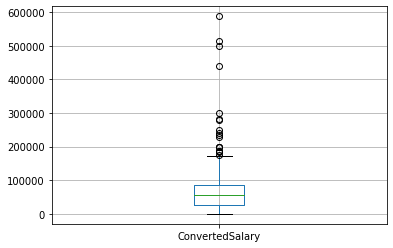

In [86]:
stack_new_df[['ConvertedSalary']].boxplot()
plt.show()

# Scaling and transforming new data
<p><b>One of the most important aspects of machine learning is the actual application of any model you create on a new dataset. For example if you built a model based on historical data, ultimately you will want to apply this model on new data to make predictions.</b></p>

### Reuse training scalers
<p><b>How you go about doing this depends on what transformations you make to the dataset before you fit the model. For example, if you applied the StandardScaler() to your data before fitting the model, you need to make sure you transform the test data using the same scalar before making predictions. <u>Please do note that the scaler is fitted only on the training data. That is, you fit and transform the training data, but only transform the test data.</u></b><p>

### Training transformations for reuse
<p><b>Similarly, if you intend to remove outliers from your test set, you should use the thresholds found on your train set to do so. If you were to use the mean and standard deviation of the test set, it could negatively impact your predictions. <u>Note that it is only in very rare cases that you would want to remove outliers from your test set.</u></b></p>

### Why only use training data?
<p><b>So why did we not refit the scaler on the test data or use thresholds from the test data? <u>To avoid data leakage.</u> In real life, you won't have access to the test data, that is, when you have deployed your model in production, you won't have access to future data, so you can't rely on it to make predictions and assess model performance.</b></p>

# Avoid data leakage!
<p><b>Thus, you should always make sure you calibrate your preprocessing steps only on your training data or else you will overestimate the accuracy of your models.</b></p>

# Introduction to Text Encoding

In [87]:
speech_data = pd.read_csv('https://raw.githubusercontent.com/danishansari09/FeatureEngineering/master/inaugural_speeches.csv')

In [88]:
speech_data['text'].head()

0    Fellow-Citizens of the Senate and of the House...
1    Fellow Citizens:  I AM again called upon by th...
2    WHEN it was first perceived, in early times, t...
3    Friends and Fellow-Citizens:  CALLED upon to u...
4    PROCEEDING, fellow-citizens, to that qualifica...
Name: text, dtype: object

### Cleaning up your text
<p><b>Unstructured text data cannot be directly used in most analyses. Multiple steps need to be taken to go from a long free form string to a set of numeric columns in the right format that can be ingested by a machine learning model. The first step of this process is to standardize the data and eliminate any characters that could cause problems later on in your analytic pipeline.</b></p>

In [89]:
# Replace all non letter characters with a whitespace
speech_data['text_clean'] = speech_data['text'].str.replace('[^a-zA-Z]', ' ')

/tmp/ipykernel_679/278907297.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  speech_data['text_clean'] = speech_data['text'].str.replace('[^a-zA-Z]', ' ')


In [90]:
# Change to lower case
speech_data['text_clean'] = speech_data['text_clean'].str.lower()

In [91]:
# Print the first 5 rows of the text_clean column
speech_data['text_clean'].head()

0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object

### High level text features
<p><b>Once the text has been cleaned and standardized you can begin creating features from the data. The most fundamental information you can calculate about free form text is its size, such as its length and number of words.</b></p>

In [92]:
# Find the length of each text
speech_data['char_cnt'] = speech_data['text_clean'].str.len()

In [93]:
# Count the number of words in each text
speech_data['word_cnt'] = speech_data['text_clean'].str.split().str.len()

In [94]:
# Find the average length of word
speech_data['avg_word_length'] = speech_data['char_cnt']/speech_data['word_cnt']

In [95]:
# Print the first 5 rows of these columns
speech_data[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']]

,text_clean,char_cnt,word_cnt,avg_word_length
0,fellow citizens of the senate and of the house...,8616,1432,6.016760
1,fellow citizens i am again called upon by th...,787,135,5.829630
2,when it was first perceived in early times t...,13871,2323,5.971158
3,friends and fellow citizens called upon to u...,10144,1736,5.843318
4,proceeding fellow citizens to that qualifica...,12902,2169,5.948363
5,unwilling to depart from examples of the most ...,7003,1179,5.939779
6,about to add the solemnity of an oath to the o...,7148,1211,5.902560
7,i should be destitute of feeling if i was not ...,19894,3382,5.882318
8,fellow citizens i shall not attempt to descr...,26322,4466,5.893865
9,in compliance with an usage coeval with the ex...,17753,2922,6.075633


<p><b><u>These features may appear basic but can be quite useful in ML models.</u></b></p>

In [96]:
# Copy of speech data
speech_data_copy = speech_data.copy()

# Word Count Representation

<p><b>Once high level information has been recorded you can begin creating features based on the actual content of each text.</b></p>

### Text to columns
<p><b>The most common approach to this is to create a column for each word and record the number of times each particular word appears in each text. This results in a set of columns equal in width to the number of unique words in the dataset, with counts filling each entry.<u>These "count" columns can then be used to train machine learning models.</u></b></p>

In [97]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [98]:
# min_df : minimum fraction of documents the word must occur in 
# max_df : maximum fraction of documents the word can occur in
cv = CountVectorizer(min_df=0.2, max_df=0.8)

In [99]:
# Fit the Vectorizer
cv.fit(speech_data['text'])

CountVectorizer(max_df=0.8, min_df=0.2)

In [100]:
# Transforming your text
cv_transformed = cv.transform(speech_data['text'])
print(type(cv_transformed))

<class 'scipy.sparse.csr.csr_matrix'>


In [101]:
# Convert Transformed text to array
cv_transformed.toarray()

array([[ 0,  0,  0, ...,  5,  0,  9],
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  1],
       ...,
       [ 0,  1,  0, ..., 14,  1,  3],
       [ 0,  0,  0, ...,  5,  1,  0],
       [ 0,  0,  0, ..., 14,  1, 11]])

In [102]:
cv_transformed.toarray().shape

(58, 818)

In [103]:
# Putting it all together
cv_df = pd.DataFrame(cv_transformed.toarray(), columns=cv.get_feature_names()).add_prefix('Counts_')

In [104]:
cv_df.head()

,Counts_abiding,Counts_ability,Counts_able,Counts_about,Counts_above,Counts_abroad,Counts_accept,Counts_accomplished,Counts_achieve,Counts_across,...,Counts_women,Counts_words,Counts_work,Counts_wrong,Counts_year,Counts_years,Counts_yet,Counts_you,Counts_young,Counts_your
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,5,0,9
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2,3,0,0,0,1
3,0,0,0,1,1,1,0,0,0,0,...,0,0,1,2,0,0,2,7,0,7
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,4,0,4


In [105]:
# Updating Original DataFrame
speech_data = pd.concat([speech_data, cv_df], axis=1, sort=False)

In [106]:
speech_data.shape

(58, 826)

In [107]:
speech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 826 entries, Name to Counts_your
dtypes: float64(1), int64(820), object(5)
memory usage: 374.4+ KB


In [108]:
speech_data.head()

,Name,Inaugural Address,Date,text,text_clean,char_cnt,word_cnt,avg_word_length,Counts_abiding,Counts_ability,...,Counts_women,Counts_words,Counts_work,Counts_wrong,Counts_year,Counts_years,Counts_yet,Counts_you,Counts_young,Counts_your
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...,fellow citizens of the senate and of the house...,8616,1432,6.016760,0,0,...,0,0,0,0,0,1,0,5,0,9
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...,fellow citizens i am again called upon by th...,787,135,5.829630,0,0,...,0,0,0,0,0,0,0,0,0,1
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t...",when it was first perceived in early times t...,13871,2323,5.971158,0,0,...,0,0,0,0,2,3,0,0,0,1
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...,friends and fellow citizens called upon to u...,10144,1736,5.843318,0,0,...,0,0,1,2,0,0,2,7,0,7
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica...",proceeding fellow citizens to that qualifica...,12902,2169,5.948363,0,0,...,0,0,0,0,2,2,2,4,0,4


# Tf-Idf Representation
<p><b>While counts of occurrences of words can be a good first step towards encoding your text to build models, it has some limitations. The main issue is counts will be much higher for very common even when they occur across all texts, providing little value as a distinguishing feature.</b></p>

###  Introducing TF-IDF
<p><b>Term Frequency Inverse Document Frequency (TF-IDF) - TF-IDF divides number of times a word occurs in the document by a measure of what proportion of the documents a word occurs in all documents. This has the effect of reducing the value of common words, while increasing the weight of words that do not occur in many documents.</b></p>

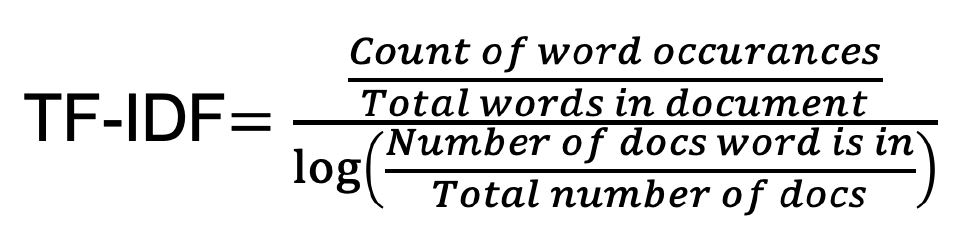

In [109]:
# Importing the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
# max_features : Maximum number of columns created from TFIDF
# stop_words : List of common words to omit e.g. "and", "the" etc.
tv = TfidfVectorizer(max_features = 100, stop_words = 'english')

In [111]:
# Fitting your text
tv.fit(speech_data['text'])
tv_transformed = tv.transform(speech_data['text'])

In [112]:
tv_transformed.toarray().shape

(58, 100)

In [113]:
# Putting it all together
tv_df = pd.DataFrame(tv_transformed.toarray(), columns = tv.get_feature_names()).add_prefix('Tfid_')

In [114]:
tv_df.head()

,Tfid_0092,Tfid_0097,Tfid_action,Tfid_administration,Tfid_america,Tfid_american,Tfid_americans,Tfid_believe,Tfid_best,Tfid_better,...,Tfid_things,Tfid_time,Tfid_today,Tfid_union,Tfid_united,Tfid_war,Tfid_way,Tfid_work,Tfid_world,Tfid_years
0,0.0,0.047468,0.000000,0.133265,0.000000,0.105269,0.0,0.000000,0.000000,0.000000,...,0.000000,0.045877,0.0,0.135859,0.203364,0.000000,0.060687,0.000000,0.045877,0.052635
1,0.0,0.000000,0.000000,0.261016,0.266097,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.199157,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.021955,0.000000,0.092456,0.157092,0.073033,0.0,0.000000,0.026118,0.060473,...,0.032037,0.021219,0.0,0.062837,0.070544,0.024344,0.000000,0.000000,0.063657,0.073033
3,0.0,0.131111,0.000000,0.092023,0.000000,0.000000,0.0,0.090286,0.116980,0.045143,...,0.047831,0.000000,0.0,0.093814,0.000000,0.036346,0.000000,0.038993,0.095038,0.000000
4,0.0,0.028455,0.041523,0.039943,0.000000,0.031552,0.0,0.000000,0.067701,0.039189,...,0.083046,0.165008,0.0,0.122162,0.030477,0.094657,0.000000,0.000000,0.055003,0.063105


In [115]:
# Inspecting your transforms
examine_rows = tv_df.iloc[0]
examine_rows.sort_values(ascending = False)

Tfid_government    0.367016
Tfid_public        0.332862
Tfid_present       0.314827
Tfid_duty          0.238368
Tfid_country       0.229385
                     ...   
Tfid_freedom       0.000000
Tfid_political     0.000000
Tfid_land          0.000000
Tfid_foreign       0.000000
Tfid_0092          0.000000
Name: 0, Length: 100, dtype: float64

In [116]:
# Updating Original DataFrame
speech_data_copy = pd.concat([speech_data_copy, tv_df], axis=1, sort=False)

In [117]:
speech_data_copy.shape

(58, 108)

In [118]:
speech_data_copy.head()

,Name,Inaugural Address,Date,text,text_clean,char_cnt,word_cnt,avg_word_length,Tfid_0092,Tfid_0097,...,Tfid_things,Tfid_time,Tfid_today,Tfid_union,Tfid_united,Tfid_war,Tfid_way,Tfid_work,Tfid_world,Tfid_years
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...,fellow citizens of the senate and of the house...,8616,1432,6.016760,0.0,0.047468,...,0.000000,0.045877,0.0,0.135859,0.203364,0.000000,0.060687,0.000000,0.045877,0.052635
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...,fellow citizens i am again called upon by th...,787,135,5.829630,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.199157,0.000000,0.000000,0.000000,0.000000,0.000000
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t...",when it was first perceived in early times t...,13871,2323,5.971158,0.0,0.021955,...,0.032037,0.021219,0.0,0.062837,0.070544,0.024344,0.000000,0.000000,0.063657,0.073033
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...,friends and fellow citizens called upon to u...,10144,1736,5.843318,0.0,0.131111,...,0.047831,0.000000,0.0,0.093814,0.000000,0.036346,0.000000,0.038993,0.095038,0.000000
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica...",proceeding fellow citizens to that qualifica...,12902,2169,5.948363,0.0,0.028455,...,0.083046,0.165008,0.0,0.122162,0.030477,0.094657,0.000000,0.000000,0.055003,0.063105


### Using n-grams
<p><b>So far you have created features based on individual words in each of the texts. This can be quite powerful when used in a machine learning model but you may be concerned that by looking at words individually a lot of the context is being ignored. To deal with this when creating models you can use n-grams which are sequence of n words grouped together. 
    For example:
<ol>
    <li>bigrams: Sequences of two consecutive words</li>
    <li>trigrams: Sequences of two consecutive words</li>
<ol>
    </b></p>
<p><b>These can be automatically created in your dataset by specifying the ngram_range argument as a tuple (n1, n2) where all n-grams in the n1 to n2 range are included.</b></p>

In [119]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
# Instantiate a trigram vectorizer
cv_bigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(2,2))

In [121]:
# Fit and apply bigram vectorizer
cv_bigram = cv_bigram_vec.fit_transform(speech_data['text'])

In [122]:
# Print the bigram features
cv_bigram_vec.get_feature_names()

['administration government',
 'almighty god',
 'america 0092',
 'american people',
 'beloved country',
 'best ability',
 'best interests',
 'blessings liberty',
 'body people',
 'branches government',
 'carry effect',
 'chief justice',
 'chief magistrate',
 'civil religious',
 'civil service',
 'common good',
 'constitution laws',
 'constitution united',
 'declaration independence',
 'defend constitution',
 'discharge duties',
 'executive department',
 'federal government',
 'fellow americans',
 'fellow citizens',
 'foreign affairs',
 'foreign nations',
 'form government',
 'free government',
 'free men',
 'free nations',
 'free people',
 'future generations',
 'general government',
 'god bless',
 'good faith',
 'good government',
 'government people',
 'government shall',
 'government union',
 'great nation',
 'great people',
 'half century',
 'human dignity',
 'human freedom',
 'know america',
 'lasting peace',
 'law abiding',
 'let resolve',
 'men women',
 'mr chief',
 'national go

### Finding common words
<p><b>Its always advisable once you have created your features to inspect them to ensure that they are as you would expect. This will allow you to catch errors early, and perhaps influence what further feature engineering you will need to do.</b></p>

In [123]:
# Create a DataFrame with the Counts features
cv_df_ = pd.DataFrame(cv_bigram.toarray(), columns=cv_bigram_vec.get_feature_names()).add_prefix('Counts_')

In [124]:
cv_sums_ = cv_df_.sum()
cv_sums_.head()

Counts_administration government    12
Counts_almighty god                 15
Counts_america 0092                 20
Counts_american people              41
Counts_beloved country               8
dtype: int64

In [125]:
cv_sums_.sort_values(ascending=False).head()

Counts_united states         157
Counts_fellow citizens       111
Counts_american people        41
Counts_federal government     35
Counts_self government        30
dtype: int64

# Summary
<b>
    <ol>
        <li>How to understand your data types</li>
        <li>Efficient encoding or categorical features</li>
        <li>Different ways to work with continuous variables</li>
        <li>How to locate gaps in your data</li>
        <li>Best practices in dealing with the incomplete rows</li>
        <li>Methods to find and deal with unwanted characters</li>
        <li>How to observe your data's distribution</li>
        <li>Why and how to modify this distribution</li>
        <li>Best practices of ,nding outliers and their removal</li>
        <li>The foundations of word embeddings</li>
        <li>Usage of Term Frequency Inverse Document Frequency (Tfidf)</li>
        <li>N-grams and its advantages over bag of words</li>
    </ol>